### 03 PyTorch Computer Vision

### 0. Computer vision libraries in PyTorch 

- torchvision - base domain library for PyTorch computer vision 
- torchvision.datasets - get datasets and data loading functions for computer vision here 
- torchvision.models - get pretrained computer vision models that you can leverage for your own problems 
- torchvision.transforms - functions for manipulating your vision data (images) to be suitable for use with an ML model 
- torch.utils.data.Dataset - Base dataset class for PyTorch 
- torch.utils.data.DataLoader - Creates a Python iterable over a dataset 

In [1]:
# PyTorch 
import torch 
from torch import nn 

# torchvision 
import torchvision 
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor 

# matplotlib 
import matplotlib.pyplot as plt 

# Check versions 
print(torch.__version__) 
print(torchvision.__version__) 

2.3.0+cu121
0.18.0+cu121


### 1 Getting a dataset 

We're going to be using the FashionMNIST to learn computer vision in PyTorch. We can grab this data from the torchvision datasets

In [2]:
# Setup training data 
train_data = datasets.FashionMNIST(
    root="data" ,  # where to download the data 
    train=True,     # do we want the training dataset 
    download=True,  
    transform=ToTensor(),    # We want the data in tensors 
    target_transform=None  # We don't want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data) 

(60000, 10000)

In [4]:
# See the first training example 
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
image.shape, type(label)

(torch.Size([1, 28, 28]), int)

In [10]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [12]:
# Check the shape of our image 
# Image shape --> [color channel, height, width]
print(f"Image shape: {image.shape}")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


### 1.2 Visualizing the data 

Image shape: torch.Size([1, 28, 28])
Label: Ankle boot


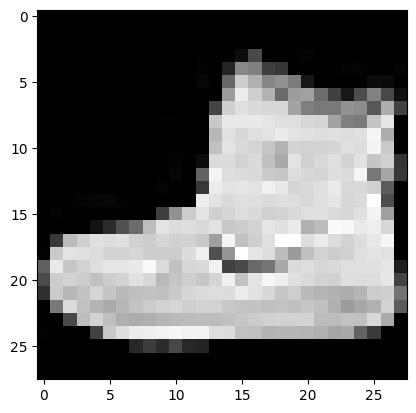

In [13]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
print(f"Label: {class_names[label]}")
plt.imshow(image.squeeze(), cmap="gray");

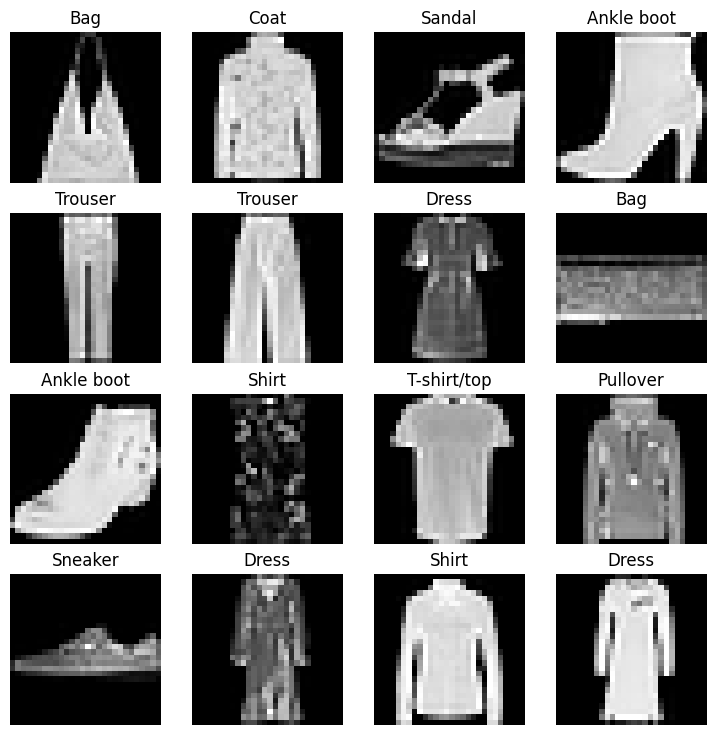

In [20]:
# Plot random images to get a feel for the data 
import random 
fig = plt.figure(figsize=(9,9)) 
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    #rand_idx = torch.randint(0, len(train_data), size=[1]).item()  Grabbing rand idx with torch, bit longer than importing random
    rand_idx = random.randint(0, len(train_data))
    img, label = train_data[rand_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray") 
    plt.title(class_names[label]) 
    plt.axis(False)

In [21]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

### 2. Prepare DataLoader 

Right now the data is a torch dataset type, but we want to convert it into a DataLoader (turn our dataset to a python iterable) 

More specifically, we want our data in batches

Batches are good because: 
1. Computational efficiency (32 images at a time instead of all 60,000 at once) 
2. Gives our neural network more chances to update its gradients per epoch 

Look up more on mini-batch gradient descent 

In [22]:
# Turn train dataset into iterables (batches)  
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)  

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x19fd4d6cb10>,
 <torch.utils.data.dataloader.DataLoader at 0x19fd56e4210>)

In [23]:
# Checking out what we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}, Batch size: {train_dataloader.batch_size}")
print(f"Length of test_dataloader: {len(test_dataloader)}, Batch size: {test_dataloader.batch_size}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000019FD4D6CB10>, <torch.utils.data.dataloader.DataLoader object at 0x0000019FD56E4210>)
Length of train_dataloader: 1875, Batch size: 32
Length of test_dataloader: 313, Batch size: 32


So instead of having the model view all 60,000 training images at once, we have 1875 batches, each with 32 images 

In [24]:
# Check out whats inside the training dataloader 
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [25]:
len(train_features_batch), len(train_labels_batch)

(32, 32)

Image size: torch.Size([1, 28, 28])
Label: 3, Label size: torch.Size([])


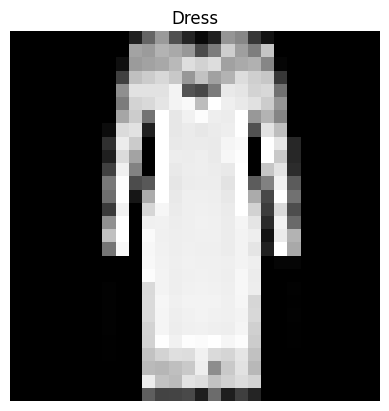

In [26]:
# Show a sample
rand_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]
plt.imshow(img.squeeze(), cmap="gray") 
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

### 3. Model 0: Baseline model

When starting to a build a series of machine learning modelling experiments, it's best practice to begin with a baseline model 

Start simple and add complexity as needed 

In [27]:
# Create a flatten layer 
flatten_model  = nn.Flatten() 

# Get a single sample 
x = train_features_batch[0]
print(f"Original shape: {x.shape}")
print(f"After flatten: {flatten_model(x).shape}")

Original shape: torch.Size([1, 28, 28])
After flatten: torch.Size([1, 784])


In [28]:
28 * 28 

784

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu" 

In [30]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x) 

In [31]:
baseline_model = FashionMNISTModelV0(input_shape=784, 
                                     hidden_units=10, 
                                     output_shape=len(class_names)).to(device)

baseline_model

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [32]:
next(baseline_model.parameters()).device

device(type='cuda', index=0)

In [33]:
# Cool way to test model output
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
baseline_model(dummy_x)

tensor([[ 0.3863,  0.6143, -0.4447,  0.0930,  0.0341, -0.1717,  0.5488, -0.4468,
         -0.1623, -0.1799]], device='cuda:0', grad_fn=<AddmmBackward0>)

We get a one logit output per class

### 3.1 setup loss, optimizer, and evaluation metrics 

- Loss function - since we're working with multi-class data, we'll use CrossEntropyLoss()
- Optimizer - SGD or Adam 
- Evaluation metrics --> accuracy function 


In [ ]:
import requests
from pathlib import Path 



In [34]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_true)) * 100 

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=baseline_model.parameters(), lr = 0.01)